In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 12

In [3]:
df = pd.read_csv("desafio_indicium_imdb.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [5]:
df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(int)
df["Gross"] = df["Gross"].str.replace(",","").astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB


In [7]:
print(df.isnull().sum())

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


---

# **Tratamento da coluna "Certificate

In [8]:
df['Certificate'].fillna('Not Rated', inplace=True)

/tmp/ipython-input-1412793593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('Not Rated', inplace=True)


---
# **Tratamento da coluna "Meta_score"**

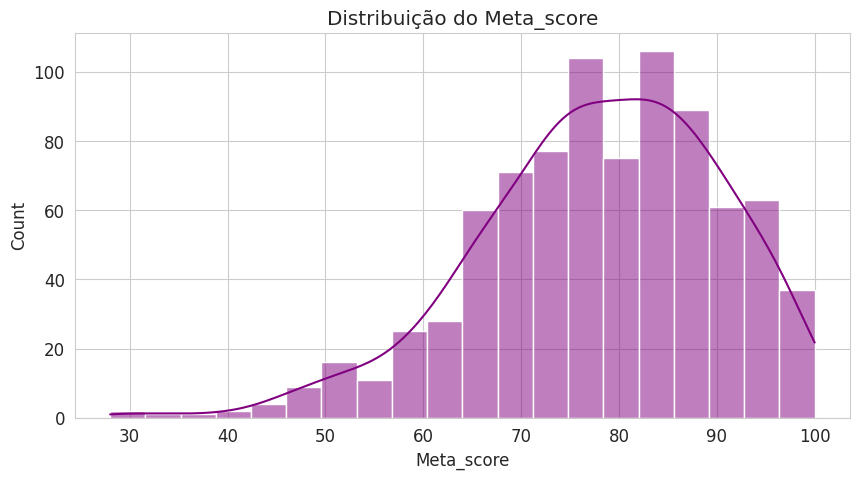

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Meta_score'].dropna(), kde=True, color='purple')
plt.title('Distribuição do Meta_score')
plt.show()

In [10]:
meta_mean = df['Meta_score'].mean()
meta_median = df['Meta_score'].median()
print(f"Média do Meta_score: {meta_mean:.2f}")
print(f"Mediana do Meta_score: {meta_median:.2f}")

Média do Meta_score: 77.97
Mediana do Meta_score: 79.00


In [11]:
df['Meta_score'].fillna(meta_median, inplace=True)

/tmp/ipython-input-116203160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(meta_median, inplace=True)


---

# **Tratamento da coluna "Meta_score"**

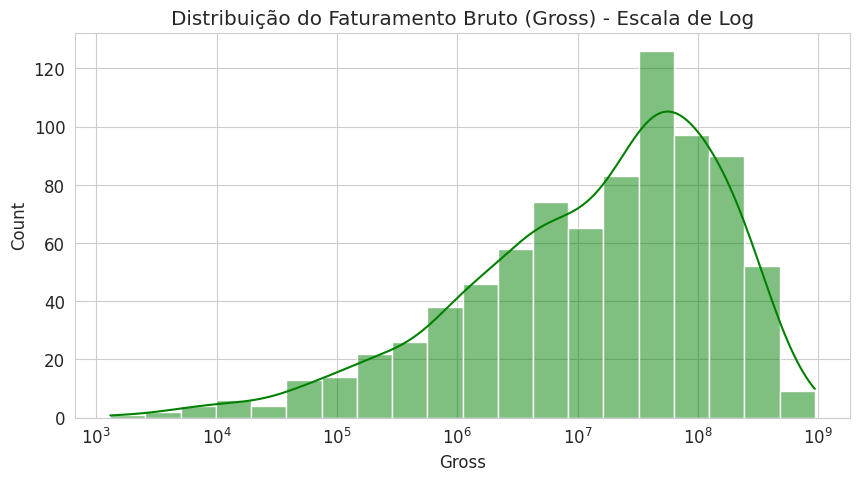

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Gross'].dropna(), kde=True, color='green', log_scale=True)
plt.title('Distribuição do Faturamento Bruto (Gross) - Escala de Log')
plt.show()

In [13]:
gross_mean = df['Gross'].mean()
gross_median = df['Gross'].median()
print(f"Média do Faturamento: ${gross_mean:,.2f}")
print(f"Mediana do Faturamento: ${gross_median:,.2f}")

Média do Faturamento: $68,082,574.10
Mediana do Faturamento: $23,457,439.50


In [14]:
df['Gross'].fillna(gross_median, inplace=True)

/tmp/ipython-input-3160985083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gross'].fillna(gross_median, inplace=True)


In [15]:
print(df.isnull().sum())

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB


---

# **Tratando coluna "Released_Year"**

In [17]:
df.loc[df['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995

In [18]:
df['Released_Year'] = df['Released_Year'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.0+ KB


---

# **1. Análise Exploratória**

**Análise de faturamento por gênero**


**Líderes de Bilheteria:** Gêneros como Aventura, Sci-Fi e Ação dominam o topo da lista, apresentando o maior faturamento mediano. Isso confirma que filmes de grande espetáculo visual são os principais motores da indústria cinematográfica em termos de receita.

In [20]:
df_genres = df.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_exploded = df_genres.explode('Genre')

In [21]:
median_gross_by_genre = df_exploded.groupby('Genre')['Gross'].median().sort_values(ascending=False)

/tmp/ipython-input-1943182047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exploded, x='Gross', y='Genre', order=median_gross_by_genre.index, palette='magma_r', showfliers=False)


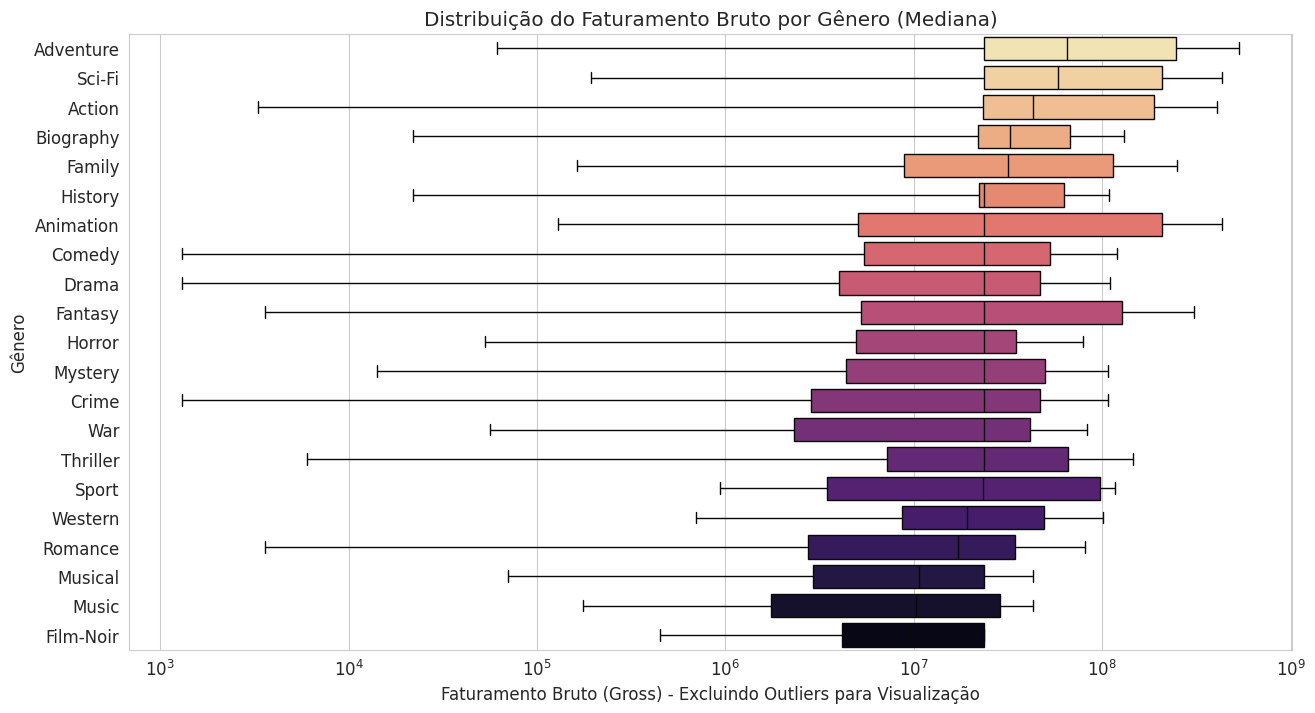

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_exploded, x='Gross', y='Genre', order=median_gross_by_genre.index, palette='magma_r', showfliers=False)
plt.title('Distribuição do Faturamento Bruto por Gênero (Mediana)')
plt.xlabel('Faturamento Bruto (Gross) - Excluindo Outliers para Visualização')
plt.ylabel('Gênero')
plt.xscale('log') # Escala de log é ótima para dados de faturamento
plt.show()

In [23]:
print("Top 5 Gêneros por Faturamento Mediano:")
print(median_gross_by_genre.head())

Top 5 Gêneros por Faturamento Mediano:
Genre
Adventure    64898511.0
Sci-Fi       57938693.0
Action       43000000.0
Biography    32572577.0
Family       31637200.0
Name: Gross, dtype: float64


---

**Análise Temporal**

**Duração Média (Runtime):** Há uma tendência de aumento na duração dos filmes a partir dos anos 1990. Isso pode significar uma maior disposição do público para narrativas mais longas e complexas, ou uma tendência dos diretores em criar filmes mais imersivos.

**Faturamento e Votos (Gross, No_of_Votes):** Essas métricas explodem a partir dos anos 60. Isso não significa necessariamente que os filmes mais novos são "melhores", mas sim o crescimento do mercado de cinema global e, principalmente, a ascensão da internet, que tornou a votação e o engajamento do público massivos e instantâneos.

**Nota Média (IMDB_Rating):** A nota média parece ter picos em certas "eras de ouro", como os anos 1950 e 2010. Isso pode indicar períodos de grande inovação no cinema.

In [24]:
df['Decade'] = (df['Released_Year'].astype(int) // 10) * 10

In [25]:
decade_analysis = df.groupby('Decade').agg({
    'IMDB_Rating': 'mean',
    'Runtime': 'mean',
    'Gross': 'mean',
    'No_of_Votes': 'mean'
}).reset_index()

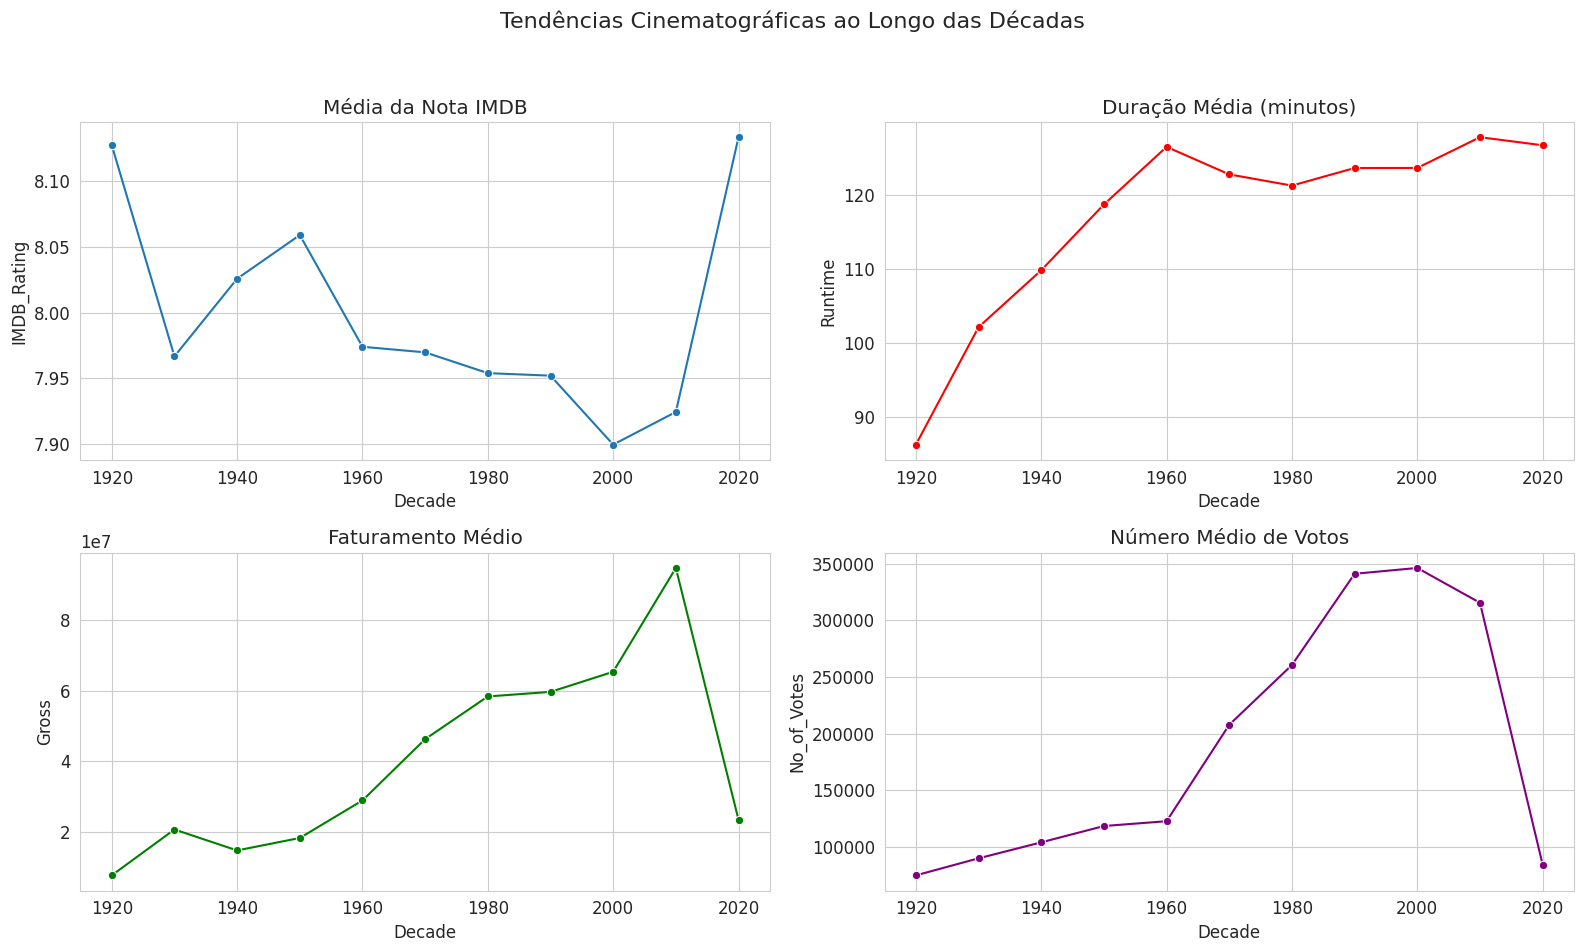

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Tendências Cinematográficas ao Longo das Décadas', fontsize=16)

sns.lineplot(ax=axes[0, 0], data=decade_analysis, x='Decade', y='IMDB_Rating', marker='o')
axes[0, 0].set_title('Média da Nota IMDB')

sns.lineplot(ax=axes[0, 1], data=decade_analysis, x='Decade', y='Runtime', marker='o', color='red')
axes[0, 1].set_title('Duração Média (minutos)')

sns.lineplot(ax=axes[1, 0], data=decade_analysis, x='Decade', y='Gross', marker='o', color='green')
axes[1, 0].set_title('Faturamento Médio')

sns.lineplot(ax=axes[1, 1], data=decade_analysis, x='Decade', y='No_of_Votes', marker='o', color='purple')
axes[1, 1].set_title('Número Médio de Votos')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

# **2. Perguntas**

---

**a. Qual filme você recomendaria para uma pessoa que você não conhece?**
- Recomendaria um filme com a maior probabilidade de agradar essa pessoa. Ou seja, um filme que tenha uma alta avaliação do público, alto número de votos.
- Ou recomendaria os melhores filmes de cada gênero.

In [48]:
recommendation = df.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=[False, False]).iloc[0]

In [49]:
print("O filme recomendado:")
print(f"Título: {recommendation['Series_Title']} ({recommendation['Released_Year']})")
print(f"Gênero: {recommendation['Genre']}")

print(f"Nota IMDB: {recommendation['IMDB_Rating']} de 10 (a mais alta do dataset).")
print(f"Número de Votos: {int(recommendation['No_of_Votes']):,} (uma das maiores votações.")

O filme recomendado:
Título: The Godfather (1972)
Gênero: Crime, Drama
Nota IMDB: 9.2 de 10 (a mais alta do dataset).
Número de Votos: 1,620,367 (uma das maiores votações.


In [27]:
def get_top_movie_for_genre(genre_name, dataframe):
    genre_df = dataframe[dataframe['Genre'] == genre_name]

    top_movie = genre_df.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=[False, False]).iloc[0]

    return top_movie

In [29]:
genres_to_recommend = ['Drama', 'Action', 'Sci-Fi', 'Crime', "Romance", "Crime", "Music", "Animation", "Biography", "Family"]

In [34]:
for genre in genres_to_recommend:
    movie = get_top_movie_for_genre(genre, df_exploded)

    print(f"🎬 Para quem gosta de '{genre}':")
    print(f"   - Título: {movie['Series_Title']} ({int(movie['Released_Year'])})")
    print(f"   - Nota IMDB: {movie['IMDB_Rating']}/10.0")
    print(f"   - Sinopse: {movie['Overview']}")
    print("-" * 40)

🎬 Para quem gosta de 'Drama':
   - Título: The Godfather (1972)
   - Nota IMDB: 9.2/10.0
   - Sinopse: An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
----------------------------------------
🎬 Para quem gosta de 'Action':
   - Título: The Dark Knight (2008)
   - Nota IMDB: 9.0/10.0
   - Sinopse: When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
----------------------------------------
🎬 Para quem gosta de 'Sci-Fi':
   - Título: Inception (2010)
   - Nota IMDB: 8.8/10.0
   - Sinopse: A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.
----------------------------------------
🎬 Para quem gosta de 'Crime':
   - Título: The Godfather (1972)
   - Nota IMDB: 9.2/10.0
   - Sinopse: An organize

---

b. **Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**
- Número de votos ("No_of_Votes")
- Ano de lançamento ("Released_Year")
- Avaliação do IMDB ("IMDB_Rating)

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [51]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [52]:
features = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', ]
target = 'Gross'

X = df[features]
y = df[target]

In [53]:
rf_model = RandomForestRegressor(random_state=42)

In [56]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [57]:
random_search.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [58]:
print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

Melhores parâmetros encontrados:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}


In [59]:
best_score_rmse = np.sqrt(-random_search.best_score_)
print(f"\nMelhor performance média (RMSE) com validação cruzada: ${best_score_rmse:,.2f}")


Melhor performance média (RMSE) com validação cruzada: $78,538,371.31


In [60]:
final_model = RandomForestRegressor(**random_search.best_params_, random_state=42)

In [62]:
final_model.fit(X, y)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=4,
                      random_state=42)

In [63]:
feature_importances = pd.Series(final_model.feature_importances_, index=features).sort_values(ascending=False)

/tmp/ipython-input-2238824018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='inferno')


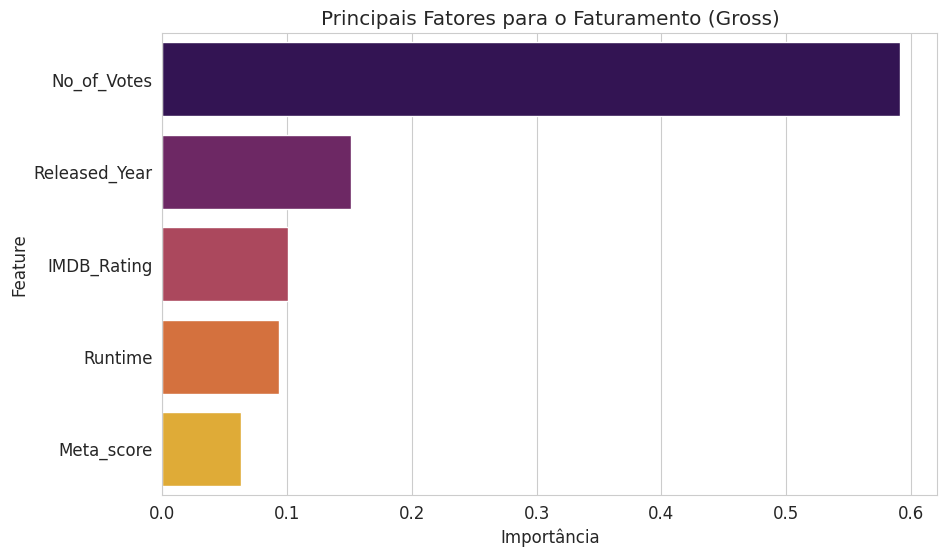

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='inferno')
plt.title('Principais Fatores para o Faturamento (Gross)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

---

c. **Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**
- Sim, é possível. Com a coluna Overview, podemos fazer uma nuvem de palavras com os termos mais frequentes de cada gênero

In [ ]:
from wordcloud import WordCloud

In [ ]:
genre = "Music"
sci_fi_text = " ".join(overview for overview in df_exploded[df_exploded['Genre'] == genre]['Overview'])

In [ ]:
wordcloud = WordCloud(background_color="black", collocations=False, width=800, height=400).generate(sci_fi_text)

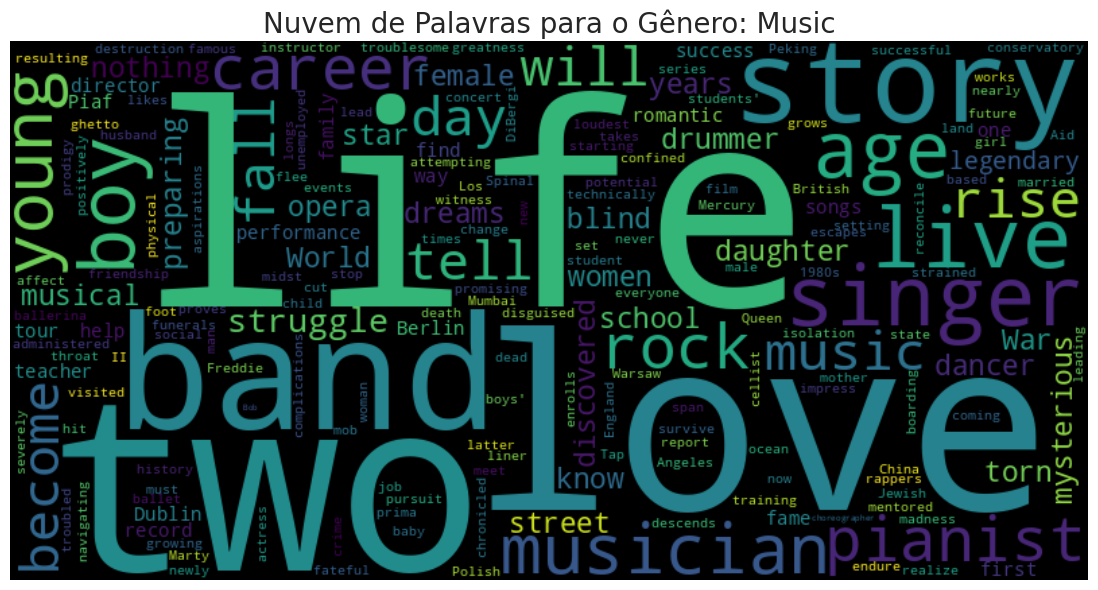

In [ ]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Nuvem de Palavras para o Gênero: {genre}", fontsize=20)
plt.show()



---


# **3. Perguntas Nota IMDB**
**a. Explique como você faria a previsão da nota do imdb a partir dos dados.**
- Primeiramente, eu prepararia e limparia os dados, verificando a existencia de dados nulos e transformando algumas colunas para números
- Definiria as colunas que seriam usadas como as "Features" e o "Target"
- Separaria os dados em dados de teste e treinamento
- Treinaria o modelo usando algum algoritmo de machine learning
- Realizaria a predição usando o modelo treinado
- Caso necessário, faria mudança em alguns hiperparametros para melhorar a performace do modelo

b. **Quais variáveis e/ou suas transformações você utilizou e por quê?**
- Utilizei como variavel: Runtime, Meta_score, No_of_Votes, Gross, Movie_age, Main_Genre e Director
- Fiz transformações em Runtime e Gross, removendo os textos contidos neste dado e converti para número, pois modelos matematicos não conseguem textos misturados só numeros.
- Criei o Movie_age, porque é uma feature mais intuitiva do que Realease_Year
- Crei o Main_Genre para dar uma simplificada para o modelo e deixar mais direta e facil dele aprender
- Utilizei a técnica One-Hot Enconding em Main_Genre e Director, pois o modelo não entende texto, então essa técnica converte cada categoria para valores númericos

**c. Qual tipo de problema estamos resolvendo (regressão, classificação)?**
- Estamos resolvendo um problema de regressão, pois prever o IMDB_Rating é um valor númerico e contínuo, logo, é um problema de regressão.

**d. Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**-
- Utilizei o modelo XGBoost Regressor, pois é um modelo bom para trabalhar com dados tabulares.

**e. Qual medida de performance do modelo foi escolhida e por quê?**
- Utilizei o RMSE, pois o resultado está na mesma unidade da nota do IMDB, o RMSE diz, em média, quantos pontos o modelo erra em suas previsões. Ex: 0.1 significa que o modelo esta errando na média de 0.1 pontos.
- O RMSE penaliza os maiores erros, ou seja, caso haja um erro muito grande, ele será penalizado muito mais que um erro pequeno. Ele faz isso calculando a diferença entre as previsões e os valores reais e elevando ao quadrado.




---


# **4. Previsão Nota IMDB**
- A previsão da nota para o novo filme é 8.96.
- Primeiramente, foi feito um treinamento no modelo sem a utilização da biblioteca SHAP, porém, utilizei a biblioteca e percebi que o modelo estava com o problema de Overfitting por Alta Cardinaliade. A coluna "Director" tinha muitos valores únicos (vários diretores diferentes). Ao aplicar o One-Hot Encoding, foi criado centenas de novas colunas para cada diretor. Como muitos diretores só tinham 1 filme, o modelo memorizou: "Se uma coluna de direto é 1, a nota é X", ou seja, isso causaria problemas com um novo filme de um diretor que ele nunca tinha visto antes.

# **Solução**
- Identifiquei os diretores que mais apareciam, manti as colunas individuais deles e agrupei os outros diretores que apareciam menos em outra categoria.
- Isso faz o modelo aprender padrões mais gerais, pois reduzi bastante o número de colunas.

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [66]:
current_year = 2025
df['Movie_Age'] = current_year - df['Released_Year']


In [67]:
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

In [68]:
numerical_features = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross', 'Movie_Age']
categorical_features = ['Main_Genre', 'Director']

features = numerical_features + categorical_features
target = 'IMDB_Rating'

In [69]:
X = df[numerical_features + categorical_features]
y = df['IMDB_Rating']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [72]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])

In [75]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Runtime', 'Meta_score',
                                                   'No_of_Votes', 'Gross',
                                                   'Movie_Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Main_Genre',
                                                   'Director'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytr...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [78]:
predictions = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"A performance quantitativa do modelo (RMSE): {rmse:.4f}")

A performance quantitativa do modelo (RMSE): 0.1906


In [79]:
import shap

In [83]:
X_test_transformed = model_pipeline.named_steps['preprocessor'].transform(X_test)
feature_names_transformed = numerical_features + \
    model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

X_test_transformed_df = pd.DataFrame(X_test_transformed.toarray(), columns=feature_names_transformed)

In [84]:
explainer = shap.TreeExplainer(model_pipeline.named_steps['regressor'])
shap_values = explainer.shap_values(X_test_transformed_df)

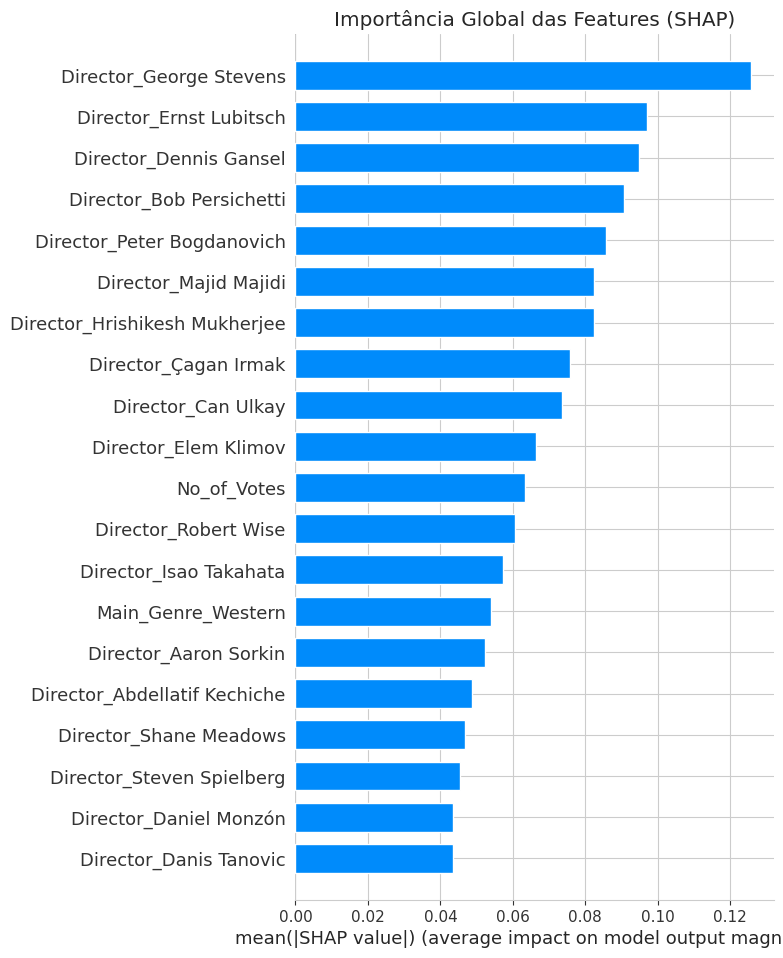

In [86]:
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", show=False)
plt.title("Importância Global das Features (SHAP)")
plt.show()

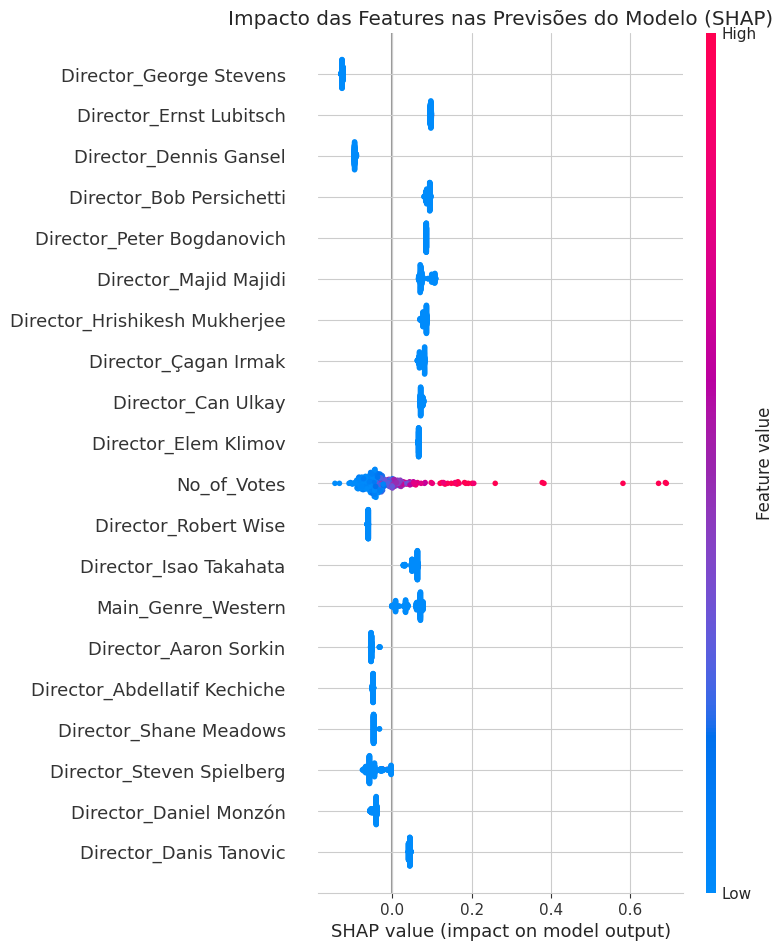

In [89]:
shap.summary_plot(shap_values, X_test_transformed_df, show=False)
plt.title("Impacto das Features nas Previsões do Modelo (SHAP)")
plt.show()

In [90]:
top_directors = df['Director'].value_counts().nlargest(15).index

In [91]:
df['Director_simplified'] = df['Director'].apply(lambda x: x if x in top_directors else 'Other')

In [92]:
print("Diretores que serão tratados como categorias individuais:")
print(top_directors.tolist())

Diretores que serão tratados como categorias individuais:
['Alfred Hitchcock', 'Steven Spielberg', 'Hayao Miyazaki', 'Martin Scorsese', 'Akira Kurosawa', 'Billy Wilder', 'Stanley Kubrick', 'Woody Allen', 'Clint Eastwood', 'David Fincher', 'Quentin Tarantino', 'Christopher Nolan', 'Howard Hawks', 'Ingmar Bergman', 'Rob Reiner']


In [93]:
categorical_features = ['Main_Genre', 'Director_simplified']

In [94]:
X = df[numerical_features + categorical_features]
y = df['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])

model_pipeline.fit(X_train, y_train)

predictions = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"A performance quantitativa do modelo (RMSE): {rmse:.4f}")

A performance quantitativa do modelo (RMSE): 0.2048


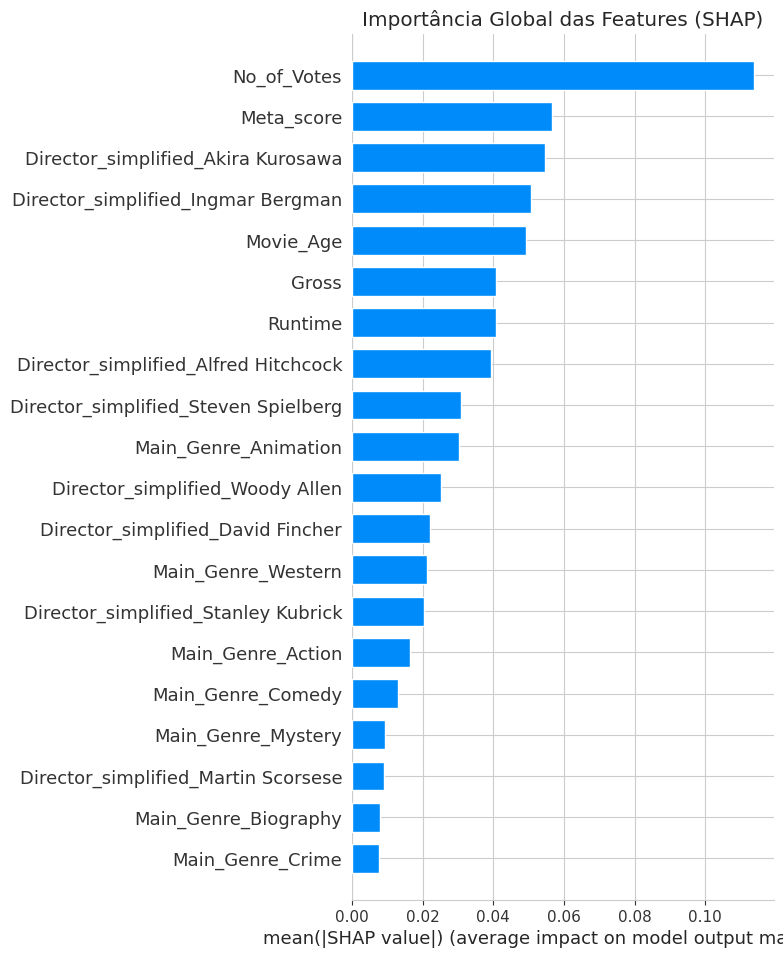

In [95]:
X_test_transformed = model_pipeline.named_steps['preprocessor'].transform(X_test)
feature_names_transformed = numerical_features + \
    model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

X_test_transformed_df = pd.DataFrame(X_test_transformed.toarray(), columns=feature_names_transformed)

explainer = shap.TreeExplainer(model_pipeline.named_steps['regressor'])
shap_values = explainer.shap_values(X_test_transformed_df)

shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", show=False)
plt.title("Importância Global das Features (SHAP)")
plt.show()

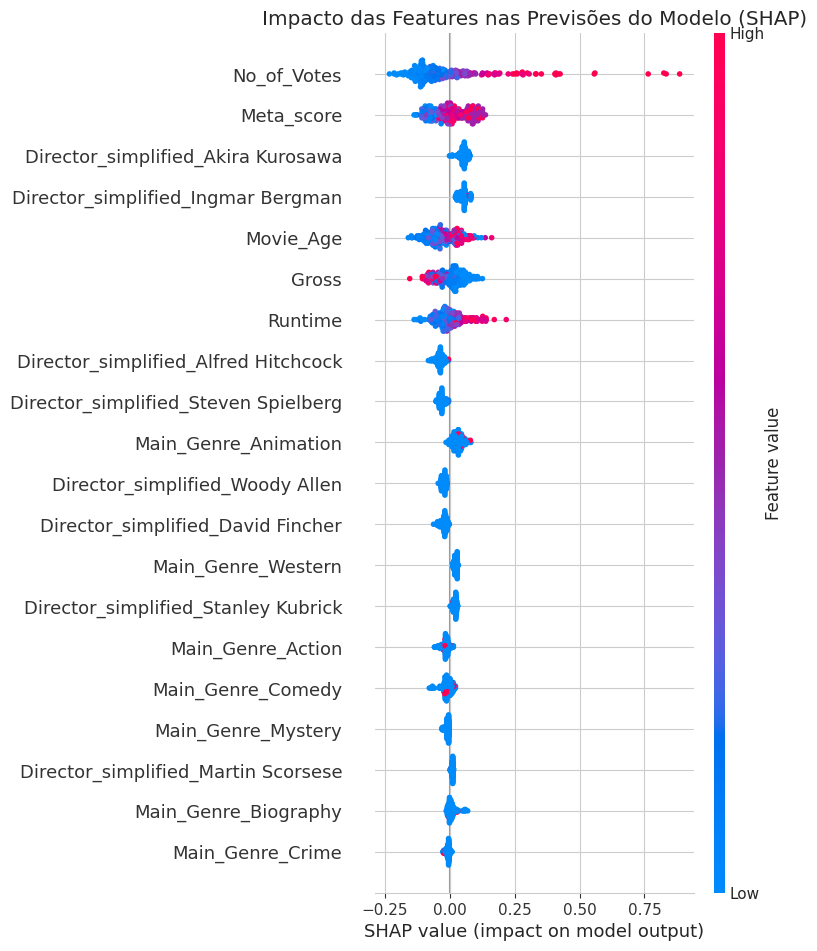

In [96]:
shap.summary_plot(shap_values, X_test_transformed_df, show=False)
plt.title("Impacto das Features nas Previsões do Modelo (SHAP)")
plt.show()

In [97]:
new_movie_data = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

In [98]:
new_movie_df = pd.DataFrame([new_movie_data])

In [99]:
new_movie_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [100]:
new_movie_df['Runtime'] = new_movie_df['Runtime'].str.replace(' min', '').astype(int)
new_movie_df['Gross'] = new_movie_df['Gross'].str.replace(',', '').astype(float)
new_movie_df['Released_Year'] = new_movie_df['Released_Year'].astype(int)
new_movie_df['Movie_Age'] = current_year - new_movie_df['Released_Year']
new_movie_df['Main_Genre'] = new_movie_df['Genre'].apply(lambda x: x.split(',')[0])

In [101]:
new_movie_df[features].head()

,Runtime,Meta_score,No_of_Votes,Gross,Movie_Age,Main_Genre,Director
0,142,80.0,2343110,28341469.0,31,Drama,Frank Darabont


In [103]:
top_directors = df['Director'].value_counts().nlargest(15).index
new_movie_df['Director_simplified'] = new_movie_df['Director'].apply(lambda x: x if x in top_directors else 'Other')

predicted_rating = model_pipeline.predict(new_movie_df)
final_prediction = predicted_rating[0]

In [104]:
print(f"A nota IMDB PREVISTA para 'The Shawshank Redemption' é:")
print(f" >> {final_prediction:.2f} << ")

A nota IMDB PREVISTA para 'The Shawshank Redemption' é:
 >> 8.96 << 




---

# **Salvando o modelo**

In [106]:
import pickle

In [107]:
filename = 'imdb_rating_predictor.pkl'

In [108]:
with open(filename, 'wb') as file:
    pickle.dump(model_pipeline, file)